## Auto Insurance Claims Analytics using Analytics Engine
This tutorial demonstrates how you can use do a simple charting of auto insurance claim data. It will guide the user to go through a step by step process to create bar chart of the number of auto claims against the reason for claim such as hail, accident etc.

### Associate an instance of Analytics Engine service with the project
This tutorial assumes that you have basic knowledge of creating a project, uploading data assets, creating notebook etc in the Watson Studio platform. If not, this __[link](https://datascience.ibm.com/docs/content/manage-data/manage-projects.html)__ is a good starting point. As with any project creation in the data science platform UI, you can associate a service with the project. I have chosen to associate the "Analytics Engine". At the time of association, if there are prexisting instances of the services, they will be automatically discovered and appear in the dropdow menu. Else you can also choose to create a new instance as you create a project. This __[link](https://medium.com/ibm-data-science-experience/exploring-the-power-of-ibm-analytics-engine-to-read-data-from-cloud-object-storage-and-stream-data)__ gives a good overview of how you can do this.
Analytics Engine is a powerful hadoop and spark based cluster that allows you to run spark and MapReduce applications. When you run python applications as in this notebook, it uses the power of Spark in the Analytics Engine cluster.

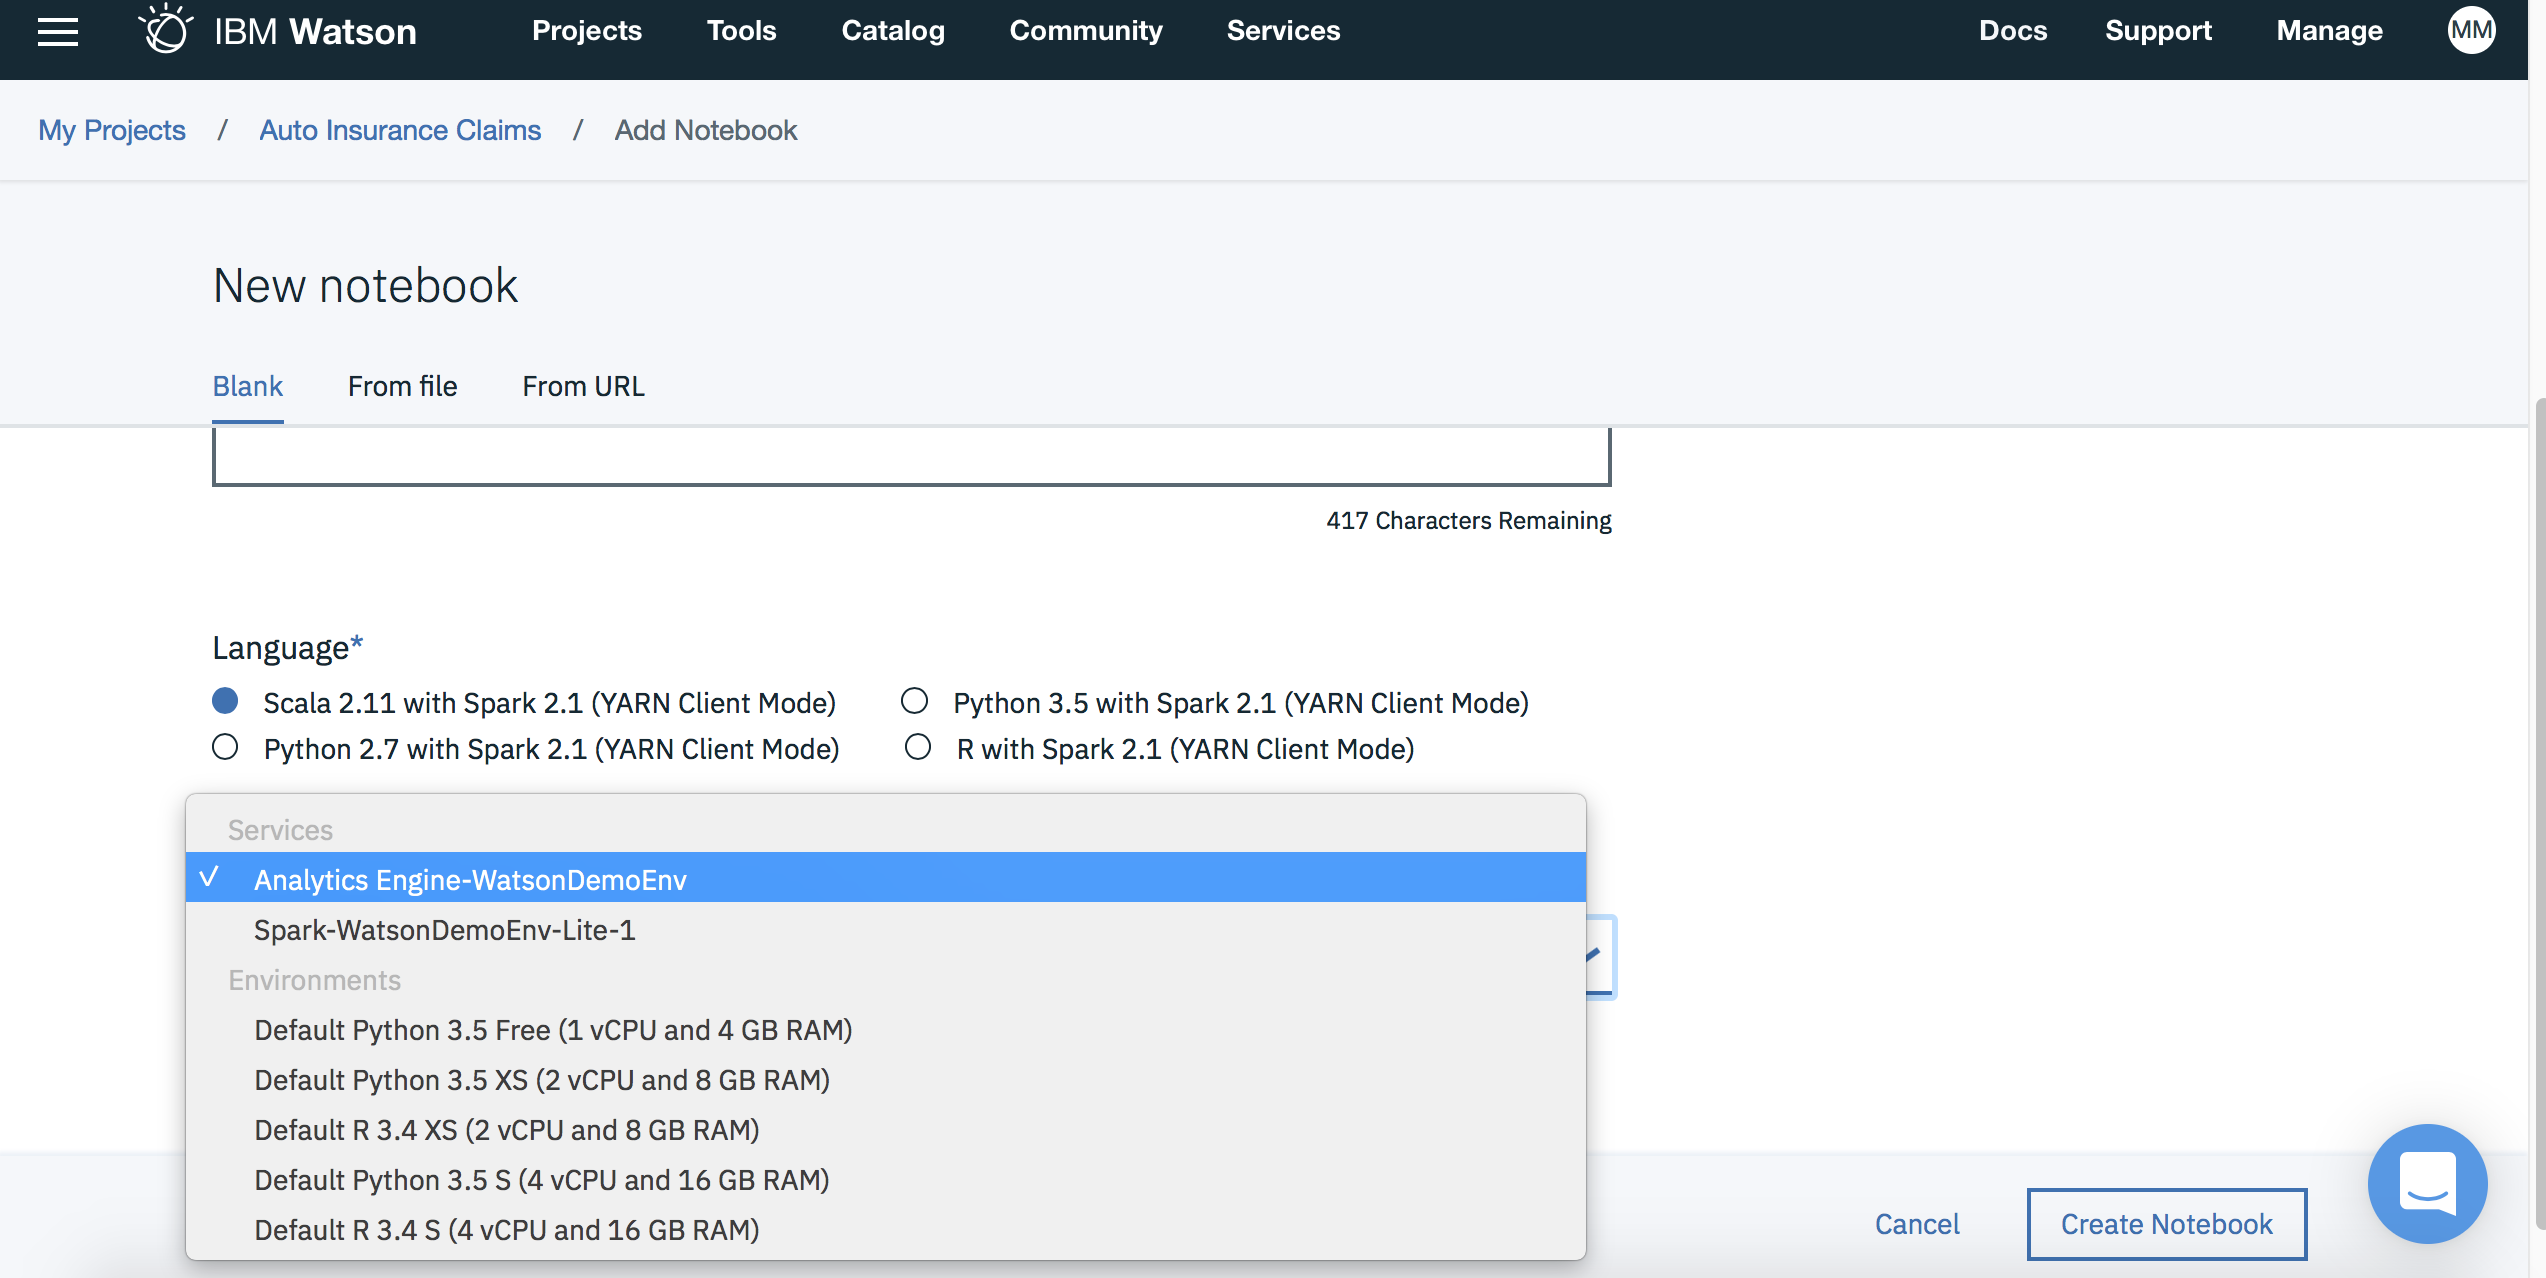

### Associate an instance of Object Store service with the project
You can also associate an object store with the project. When you do that all of the assets associated with the project automatically get stored in the objectstore, transparently. 


### Upload a data set
For this notebook, I have taken a the publicly available Auto Insurance Claims - Automobile Insurance claims including location, policy type and claim amount http://dyzz9obi78pm5.cloudfront.net/app/image/id/560ec66d32131c9409f2ba54/n/Auto_Insurance_Claims_Sample.csv
First I downloaded this as a .csv and uploaded into the "Assets" section of the project. It will now be available for use within the notebook

### Refine the dataset
You can make use of the "DataRefinery" feature to make modifications or corrections to this rawdata. For example, all data is  considered as type "String" by default. Depending on the data you want to analyze, you can specify the data to be of type float, boolean etc. Another refinement could be for renaming of columns. As there are spaces in the column names in the original sheet, you can edit and rename as needed. Orignal heading for "Claim Reason" was renamed to "Claim_Reason" as given below.

![image%20%2818%29.png](attachment:image%20%2818%29.png )

### Insert To Code
Insert To Code is a neat utility that abstracts much of the connectivity details to the data asset on object store. It automatically detects the language of the notebook and offers appropriate code templates that you can choose from. It also automatically discovers the objecstore credentials that is needed for connection and puts in those details as well.
![image%20%2820%29.png](attachment:image%20%2820%29.png =100x20)
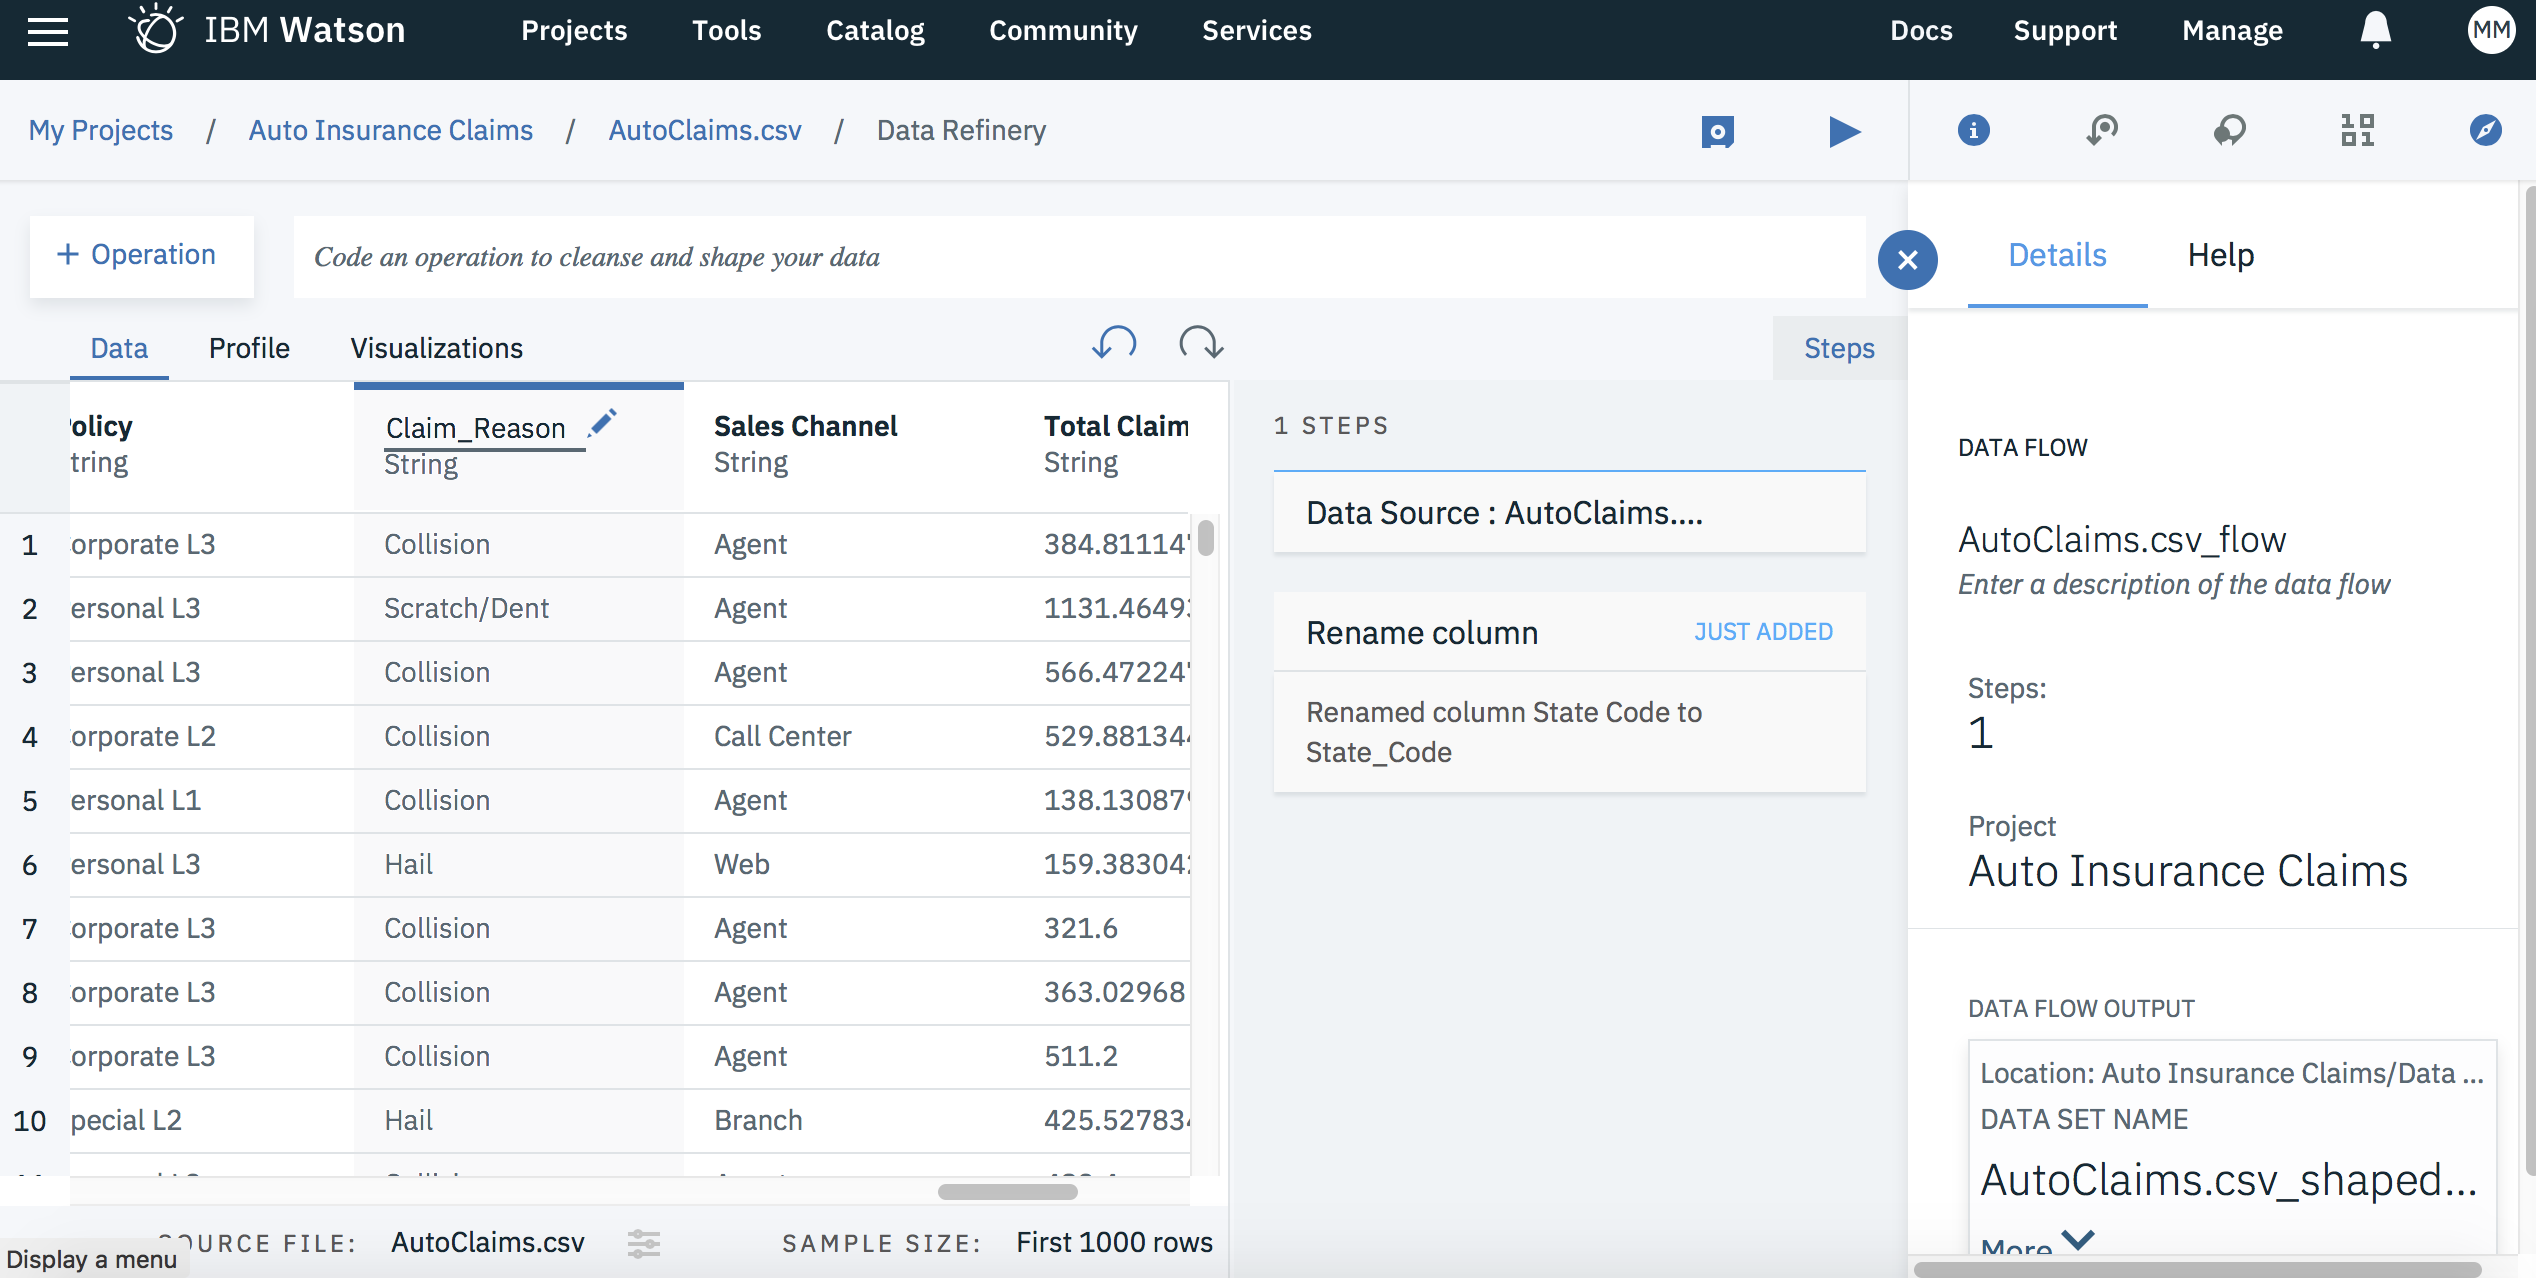

In [10]:
# The code was removed by DSX for sharing.

### Use Spark SQL along with plotting library to get a simple chart
The auto generated code above reads the data from COS and creates a dataframe. To learn about Apache Spark and dataframes, this __[link](https://datascience.ibm.com/exchange/public/entry/view/95811fca38af4ccbea8acf8658bedcfc)__ is an excellent place to start. In order to execute SQL statements using spark, you can register the data as a temporary table as given below.
Finally, we make use of a pythong plotting library matplotlib to create a simple bar chart. The below graph shows that claims due to collision is highest followed by natural forces such as hail and then reasons such as a scratch/dent.

In [11]:
df_data_1.registerTempTable("auto_claims")
%matplotlib inline 
import matplotlib.pyplot as plt, numpy as np
pandaPlot = sqlContext.sql("select CLAIM_REASON, count(*) AS COUNT from auto_claims GROUP BY CLAIM_REASON").toPandas()
pandaPlot.plot(kind='bar', x='CLAIM_REASON', y='COUNT', figsize=(12, 5))